In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

We will use Iris dataset to explore PCA

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print(f"Input shape: {X.shape}")
print(f"Output shape: {y.shape}")

Input shape: (150, 4)
Output shape: (150,)


In [4]:
data = pd.DataFrame(X, columns = feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Calculating mean and standard deviation of the columns
means = data.mean()
stds = data.std()
print(f"Means: {means}")
print(f"Standard deviations: {stds}")

Means: sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
Standard deviations: sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


In [6]:
# Each column will have mean = 0
for i in range(0,4):
  data.iloc[:, i] = data.iloc[:, i] - means[i]
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333


In [7]:
# Reducing dimensions to 2
pca = PCA(n_components = 2)
pc_fit = pca.fit(data)

In [8]:
#components_ is a matrix having loading vectors for the components
components = pc_fit.components_
print(components)
print(pc_fit.explained_variance_ratio_)
for component in components:
  sum_of_squared_components = 0
  for j in component:
    sum_of_squared_components += j ** 2
  print(f"Sum of squared components: {sum_of_squared_components}")

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
[0.92461872 0.05306648]
Sum of squared components: 0.9999999999999996
Sum of squared components: 0.9999999999999998


* First principal component places more weight on petal length and some weight on petal width and sepal length, while the second principal component places more weights on sepal length and sepal width.  
* Sepal length and sepal width have similar weights in the 2nd principal component, showing high correlation between them.  
* First 2 principal components explain almost 97% of the total variance in the data.  
* Sum of squares of loadings in each component equals 1.

In [9]:
#transform is a function which will return a matrix of new scores for the principal components
pc_fit_transformed = pca.transform(data)
pc1 = []
pc2 = []
# Segregating principal component 1 and principal component 2 scores
for element in pc_fit_transformed:
  pc1.append(element[0])
  pc2.append(element[1])

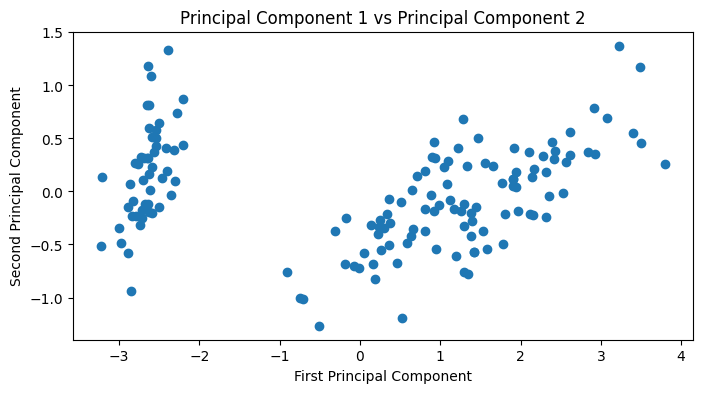

In [10]:
plt.figure(figsize=(8,4))
plt.scatter(pc1, pc2)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Principal Component 1 vs Principal Component 2')
plt.show()